In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [31]:
np.random.seed(0)
X=np.random.randint(low=0, high=100, size=(100), dtype=int)

In [32]:
X=np.array(X)

In [33]:
Y=3*X+100+np.random.randint(low=0, high=20, size=(100), dtype=int)

In [34]:
Y=np.array(Y)

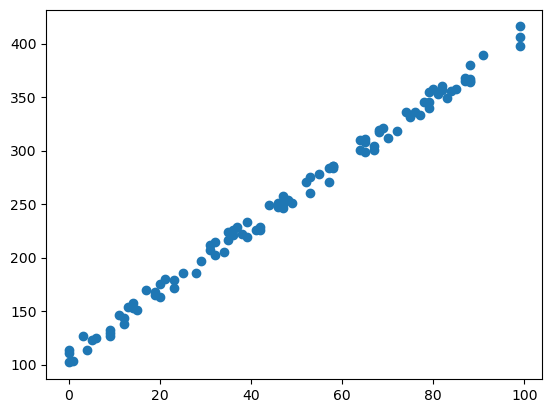

In [35]:
plt.scatter(X,Y)
plt.show()

In [36]:
def hypothesis(w,x,b):
    (wXb) = (w * x + b).reshape(-1)
    return (wXb)
    

In [37]:
def loss_function(Y,h):
    return np.mean(np.subtract(Y,h)**3)

In [38]:
def gradient_descent(w,b,X,Y,alpha):
    h=hypothesis(w,X,b)
    # Reshape arrays to ensure compatibility for element-wise operations
    dw = -3 * np.sum((X * (Y - h) ** 2* np.sign(Y-h) ))

    db = -3 * np.sum((Y - h) ** 2 * np.sign(Y - h))

    w=w-alpha*dw
    b=b-alpha*db
    return w,b

In [39]:
epoch=5000000
alpha=0.000000001


(1,)


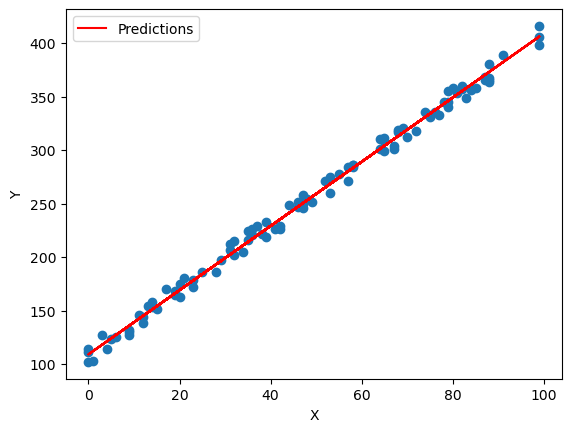

[3.00007979]
[109.07193326]


In [41]:
w = np.random.randn(1)
b = np.random.randn(1)
h=hypothesis(w,X,b)
l=[]
for i in range(epoch):
    w,b=gradient_descent(w,b,X,Y,alpha)
    l.append(loss_function(Y,h))
y_pred=w*X+b
print(b.shape)
plt.scatter(X, Y)
plt.plot(X, y_pred, 'r-', label='Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
print(w)
print(b)

In [42]:
np.random.seed(0)
X2=np.random.rand(100)
X2=np.array(X2)
X2.reshape(-1)
X2.shape

(100,)

In [43]:
Y2=0.2*X2**2+X2+np.random.rand(100)

In [44]:
Y2=np.array(Y2)
Y2.shape

(100,)

In [45]:
Y2_min = np.min(Y2)
Y2_max = np.max(Y2)
Y2_normalized = (Y2 - Y2_min) / (Y2_max - Y2_min)

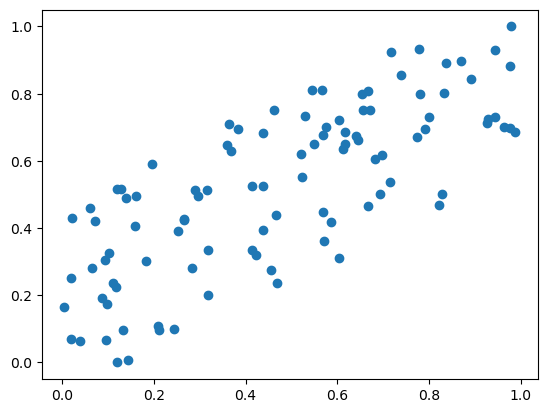

In [46]:
plt.scatter(X2,Y2_normalized)
plt.show()

In [47]:
def hypothesis2(u,v,w,x):
    u_v_w = (u * x+v*x**2 + w).reshape(-1)
    return (u_v_w)
    

In [48]:
def loss_f2(Y,h):
    return np.mean(np.abs(np.subtract(Y,h)**7))

In [49]:
#def except the fault that the error line is showing

In [50]:
def gradient_descent2(u, v, w, X2, Y2, alpha):
    h = hypothesis2(u, v, w, X2)
  
    du = -7 * np.sum((X2 * (Y2 - h) ** 6 * np.sign(Y2 - h)))
    dv =  -7*np.sum((Y2-h)**6*X2**2*np.sign(Y-h))
    dw = -7 * np.sum((Y - h) ** 6 * np.sign(Y - h))

    u = u - alpha * du
    v = v - alpha * dv
    w = w - alpha * dw
    
    return u, v, w


In [51]:
epoch=2
alpha=0.00000000000000000000000000000001

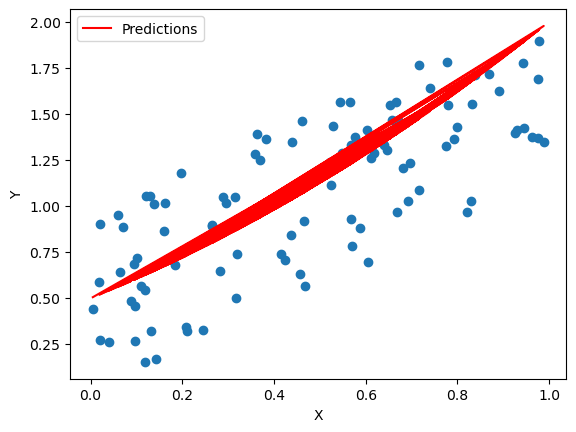

1.0
0.5
0.5000000000000109


In [52]:
u = 1
v = 0.5
w =0.5
h=hypothesis2(u,v,w,X2)
for i in range(epoch):
    u,v,w=gradient_descent2(u,v,w,X2,Y2_normalized,alpha)
    
y_pred2=u*X2+(v*X2**2)+w

plt.scatter(X2, Y2)
plt.plot(X2, y_pred2, 'r-', label='Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
print(u)
print(v)
print(w)

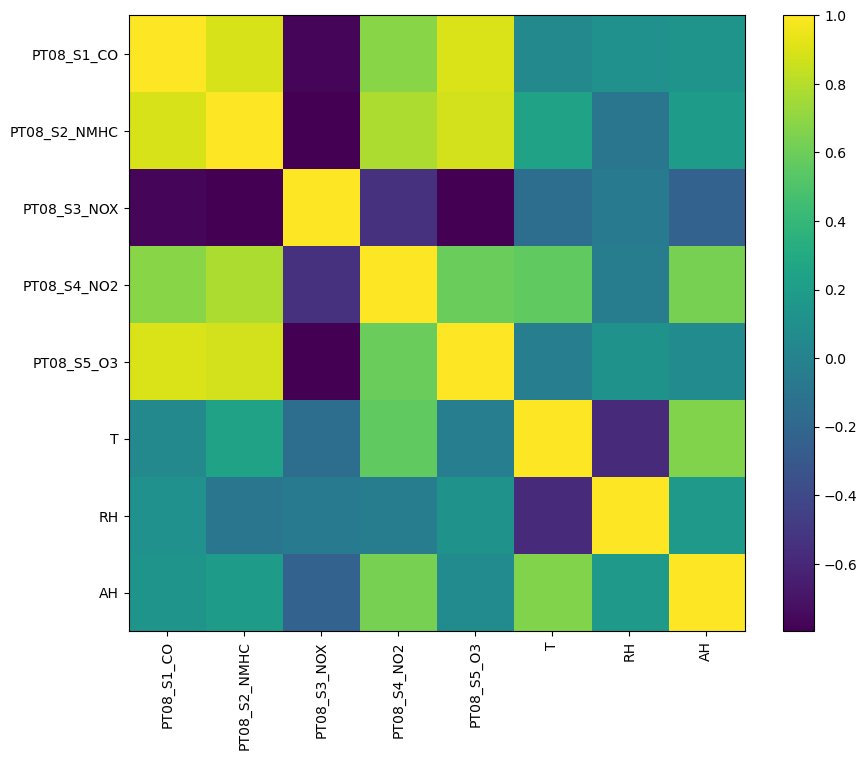

      PT08_S1_CO  PT08_S2_NMHC  PT08_S3_NOX  PT08_S4_NO2  PT08_S5_O3     T  \
0         1360.0        1046.0       1056.0       1692.0      1268.0  13.6   
1         1292.0         955.0       1174.0       1559.0       972.0  13.3   
2         1402.0         939.0       1140.0       1555.0      1074.0  11.9   
3         1376.0         948.0       1092.0       1584.0      1203.0  11.0   
4         1272.0         836.0       1205.0       1490.0      1110.0  11.2   
...          ...           ...          ...          ...         ...   ...   
9352      1314.0        1101.0        539.0       1374.0      1729.0  21.9   
9353      1163.0        1027.0        604.0       1264.0      1269.0  24.3   
9354      1142.0        1063.0        603.0       1241.0      1092.0  26.9   
9355      1003.0         961.0        702.0       1041.0       770.0  28.3   
9356      1071.0        1047.0        654.0       1129.0       816.0  28.5   

        RH      AH  
0     48.9  0.7578  
1     47.7  0.7255  


In [53]:
import pandas as pd
import numpy as np

col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']
r=list(np.arange(len(col)))
df=pd.read_csv("AirQualityUCI.csv", delimiter=";", decimal=",",header=None,skiprows=1,names=col,usecols=r)
df.dropna(how='all',inplace=True)
df.replace(-200, np.nan, inplace=True)
df = df.drop(['DATE','TIME', 'CO_GT', 'NMHC_GT', 'C6H6_GT', 'NOX_GT', 'NO2_GT'], axis=1)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

correlation_matrix = df_imputed.corr()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap="viridis", interpolation="none")
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

df_cleaned = df_imputed.dropna()
print(df_cleaned)

X = df_cleaned.drop("RH", axis=1)
y = df_cleaned["RH"]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]

theta = np.linalg.inv(X_train_bias.T.dot(X_train_bias)).dot(X_train_bias.T).dot(y_train)

X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred_numpy = X_test_bias.dot(theta)

from sklearn.linear_model import LinearRegression
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)
from sklearn.metrics import r2_score, mean_squared_error
y_pred_sklearn = model_sklearn.predict(X_test)

In [54]:
r2_numpy = r2_score(y_test, y_pred_numpy)
mse_numpy = mean_squared_error(y_test, y_pred_numpy)

r2_sklearn = r2_score(y_test, y_pred_sklearn)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

print("Numpy - R2 Score:", r2_numpy, "MSE:", mse_numpy)
print("Sklearn - R2 Score:", r2_sklearn, "MSE:", mse_sklearn)


Numpy - R2 Score: 0.8669265474464115 MSE: 38.60450950862424
Sklearn - R2 Score: 0.8669265474464115 MSE: 38.60450950862424


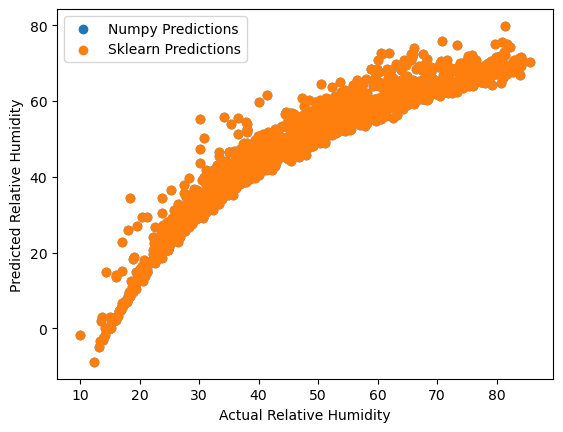

In [55]:
plt.scatter(y_test, y_pred_numpy, label='Numpy Predictions')
plt.scatter(y_test, y_pred_sklearn, label='Sklearn Predictions')
plt.xlabel('Actual Relative Humidity')
plt.ylabel('Predicted Relative Humidity')
plt.legend()
plt.show()